In [18]:
import pandas as pd
import numpy as np

sentiment140 = pd.read_csv('data/sentiment140.csv') # Only 139 neutral example
climatechange = pd.read_csv('data/climatechange.csv')
moviereview = pd.read_csv('data/moviereview.csv')

climatechange = climatechange.replace({"target": {"Yes": "positive", "Y": "positive", "N": "negative", "No": "negative"}})
climatechange = climatechange.fillna("neutral")

data = [sentiment140, climatechange, moviereview]

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import scikitplot as skplt

class Model:
    def __init__(self, data):
        self.x = data.text
        self.y = data.target
        self.params = [{'clf__alpha': np.arange(0.05, 1, 0.05)}]
        self.split()
        
    def split(self):
        self.train_x, self.val_x, self.train_y, self.val_y = train_test_split(self.x, 
                                                                              self.y, 
                                                                              test_size=0.2, 
                                                                              stratify=self.y, 
                                                                              random_state=42)
    def accuracy(self, x=None, y=None):
        if not not (x is None) or not not (y is None):
            x = self.val_x
            y = self.val_y
            
        pred = self.model.predict(x)
        acc = accuracy_score(pred, y)
        print('Accuracy: {:.5f}'.format(acc))
        skplt.metrics.plot_confusion_matrix(y, pred, normalize=True, figsize=(10,10))
        plt.show()
        return pred
    
    def train(self, cross=False):
        print("Creating model... ", end='')
        self.model = Pipeline([('vect', CountVectorizer(lowercase=True, ngram_range=(1, 1), analyzer='word')),
                            ('tfidf', TfidfTransformer()),
                            ('clf', MultinomialNB(alpha=0.1))])
        if cross:
            self.model = GridSearchCV(self.model, self.params, cv=5)
        print("ok\nTraining... ", end='')
        self.model.fit(self.train_x, self.train_y)
        print("ok")
        if cross:
            print("Best params: ", self.model.best_params_)

In [29]:
s140 = Model(climatechange)
s140.train()

Creating model... ok
Training... ok


Accuracy: 0.68574


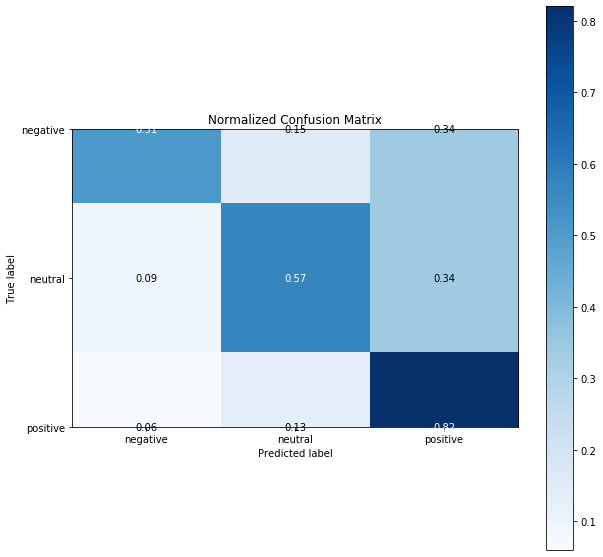

In [30]:
pred_val = s140.accuracy()

Accuracy: 0.55364


/home/gbaril/anaconda3/lib/python3.7/site-packages/scikitplot/metrics.py:124: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


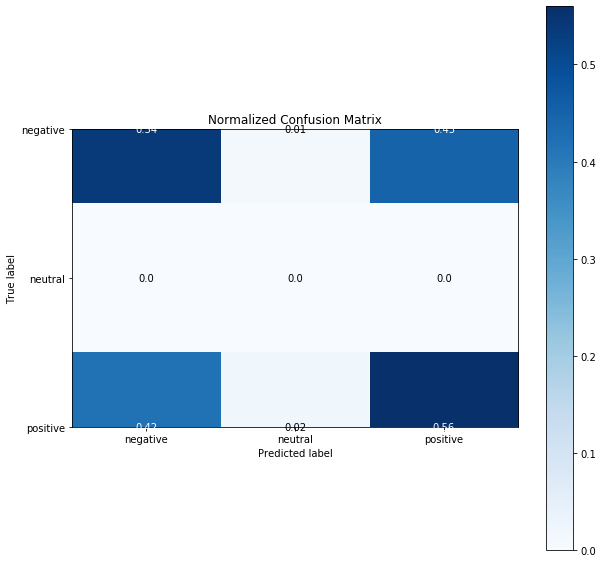

In [32]:
x = moviereview.text
y = moviereview.target

pred = s140.accuracy(x, y)